# THÔNG TIN CÁ NHÂN

---

Họ và tên: Nguyễn Nhật Trường

MSSV: 20522087

Bài tập thực hành 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import một số thư viện cần thiết

In [2]:
import torch
import torchvision
from torchvision import datasets
from imutils import paths
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import os
import cv2
import numpy as np

# Download Caltech101 dataset 

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/cs331_advanced_cv'

In [5]:
dataset =  datasets.Caltech101(path, download=True)

0it [00:00, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/cs331_advanced_cv/caltech101/101_ObjectCategories.tar.gz to /content/drive/MyDrive/Colab Notebooks/cs331_advanced_cv/caltech101


0it [00:00, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/cs331_advanced_cv/caltech101/Annotations.tar to /content/drive/MyDrive/Colab Notebooks/cs331_advanced_cv/caltech101


In [6]:
image_paths = list(paths.list_images('/content/drive/MyDrive/Colab Notebooks/cs331_advanced_cv/caltech101'))

data = []
labels = []
for img_path in tqdm(image_paths):
    label = img_path.split(os.path.sep)[-2]
    if label == "BACKGROUND_Google":
        continue
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    size = img.shape[0]*img.shape[1]
    hist = hist/size

    data.append(hist)
    labels.append(label)
    
data = np.array(data)
labels = np.array(labels)


100%|██████████| 9144/9144 [00:33<00:00, 272.50it/s]


In [7]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(f"Total Number of Classes: {len(lb.classes_)}")

Total Number of Classes: 101


In [8]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2


x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


x_train = x_train.reshape(len(x_train), 256)
x_val = x_val.reshape(len(x_val), 256)
x_test = x_test.reshape(len(x_test), 256)
print('So luong tap train: ',len(x_train))
print('So luong tap val: ',len(x_val))
print('So luong tap test: ',len(x_test))

So luong tap train:  5206
So luong tap val:  1735
So luong tap test:  1736


# YÊU CẦU 1

---

Áp dụng thuật toán KNN, tính Accuracy trên tập val và test với các giá trị k lần lượt:1,2,3,4,5

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
best_score_val = 0
best_k_val = 0

best_score_test = 0
best_k_test = 0

for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    # Calculate score for val and test
    score_val = knn.score(x_val, y_val)
    score_test = knn.score(x_test, y_test)

    # Find max score_val
    if score_val > best_score_val:
        best_score_val = score_val
        best_k_val = i
    
    # Find max score_test
    if score_test > best_score_test:
        best_score_test = score_test
        best_k_test = i
    
    print(f'KNN with k={i}:')
    print(f'    Score val: {score_val}')
    print(f'    Score test: {score_test}')

print(f"Best score")
print(f"With k = {best_k_val}, Best score val: {best_score_val}")
print(f"With k = {best_k_test}, Best score test: {best_score_test}")

KNN with k=1:
    Score val: 0.2069164265129683
    Score test: 0.23387096774193547
KNN with k=2:
    Score val: 0.20864553314121037
    Score test: 0.2350230414746544
KNN with k=3:
    Score val: 0.22420749279538904
    Score test: 0.24596774193548387
KNN with k=4:
    Score val: 0.2340057636887608
    Score test: 0.24308755760368664
KNN with k=5:
    Score val: 0.23804034582132566
    Score test: 0.24308755760368664
Best score
With k = 5, Best score val: 0.23804034582132566
With k = 3, Best score test: 0.24596774193548387


# YÊU CẦU 2

---

Áp dụng thuật toán SVC (với tham số C=1)

Tính Accuracy cho tập test

Tính Precision của từng lớp (class)

In [14]:
from sklearn.svm import SVC

In [17]:
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.metrics import classification_report

In [15]:
svc = SVC(C=1)
svc.fit(x_train,y_train)

SVC(C=1)

In [16]:
score_val = svc.score(x_val,y_val)
print(f'Mean accuracy SVC on val: {score_val}')
score_test = svc.score(x_test,y_test)
print(f'Mean accuracy SVC on test: {score_test}')

Mean accuracy SVC on val: 0.2489913544668588
Mean accuracy SVC on test: 0.2597926267281106


In [18]:
y_pred_test = svc.predict(x_test)
print("Accuracy cho tap test: ",accuracy_score(y_pred_test,y_test))

Accuracy cho tap test:  0.2597926267281106


In [20]:
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.29      0.11      0.16       273
           1       0.79      0.13      0.22       475
           2       0.60      0.27      0.37        89
           3       0.78      0.47      0.59       304
           4       0.25      0.10      0.14        20
           5       0.83      0.49      0.61       267
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.50      0.50      0.50         4
          12       0.00      0.00      0.00         6
          13       0.27      0.14      0.19        28
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         2
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# YÊU CẦU 3

---

Áp dụng thuật toán SVC (với tham số C=1)

Sử dụng chiến lược 1 vs 1:


*   Tính Accuracy cho tập test
*   Tính số support vector
*   Tính và hiển thị ma trận Confusion


In [27]:
import matplotlib.pyplot as plt

In [28]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

In [24]:
# Sử dụng chiến lực one-vs-one
svc_one_vs_one = SVC(C=1,decision_function_shape='ovo')
svc_one_vs_one.fit(x_train,y_train)

SVC(C=1, decision_function_shape='ovo')

In [25]:
y_pred_test_ovo = svc_one_vs_one.predict(x_test)
print("Accuracy cho tap test: ", accuracy_score(y_pred_test_ovo,y_test))

Accuracy cho tap test:  0.2597926267281106


In [26]:
print("So support vector la: ",svc_.support_vectors_.shape[0])

So support vector la:  4807


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


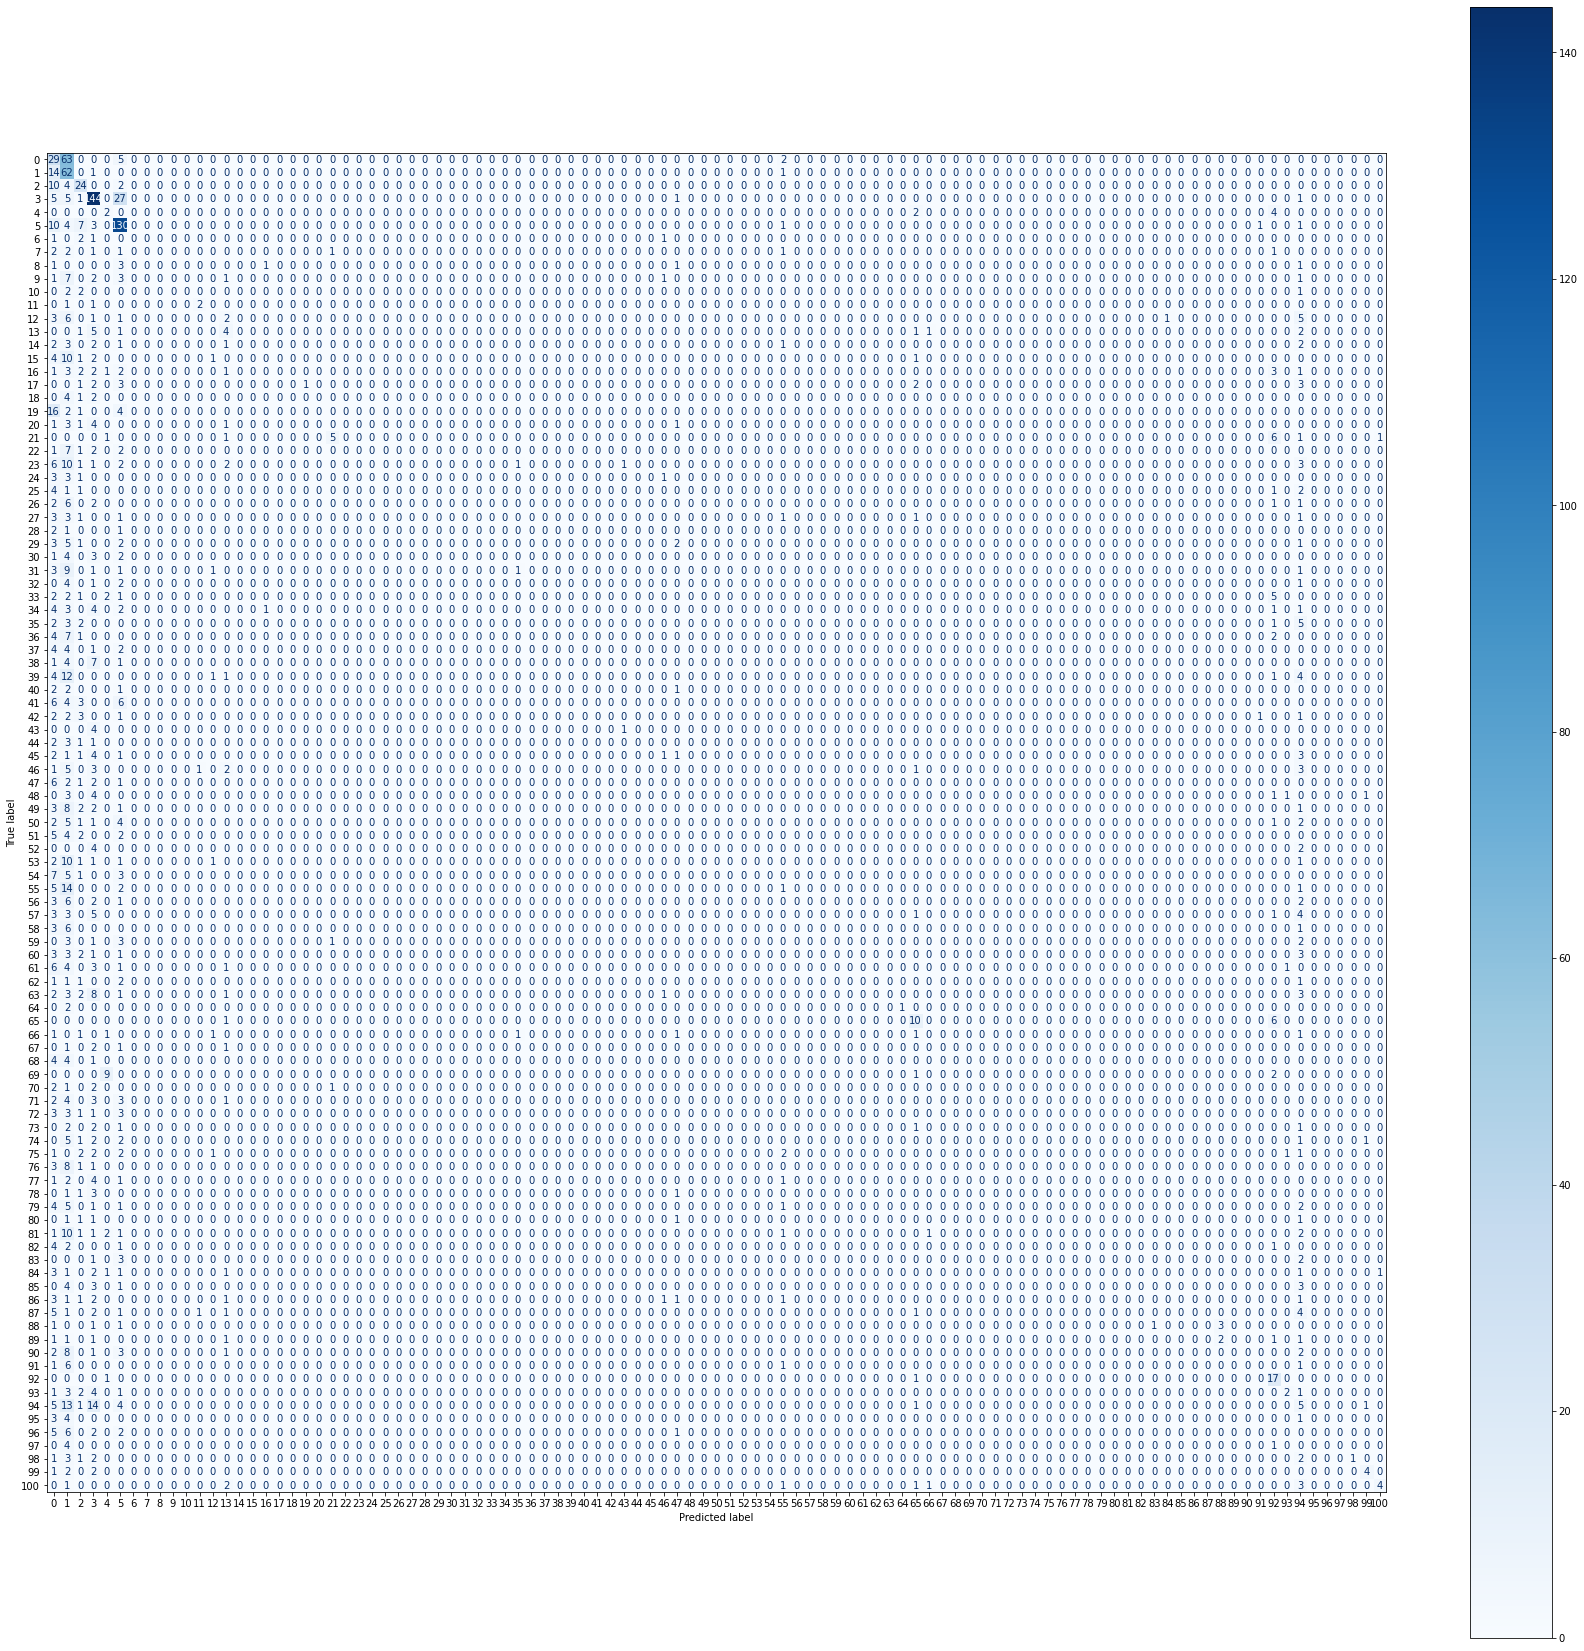

In [30]:
fig, ax = plt.subplots(figsize=(30,30))
plot_confusion_matrix(svc_one_vs_one,x_test,y_test,cmap=plt.cm.Blues,ax=ax)

# YÊU CẦU 4

---

Áp dụng thuật toán SVC (với tham số C=1)

Sử dụng chiến lược 1 vs rest:

*   Tính Accuracy cho tập test
*   Tính số support vector
*   Tính và hiển thị ma trận Confusion


In [31]:
svc_one_vs_rest = SVC(C=1,decision_function_shape= 'ovr')
svc_one_vs_rest.fit(x_train,y_train)

SVC(C=1)

In [33]:
y_pred_test_ovr = svc_one_vs_rest.predict(x_test)
print("Accuracy cho tap test: ",accuracy_score(y_pred_test_ovr,y_test))

Accuracy cho tap test:  0.2597926267281106


In [34]:
print("So support vector: ",svc_one_vs_rest.support_vectors_.shape[0])

So support vector:  4807


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


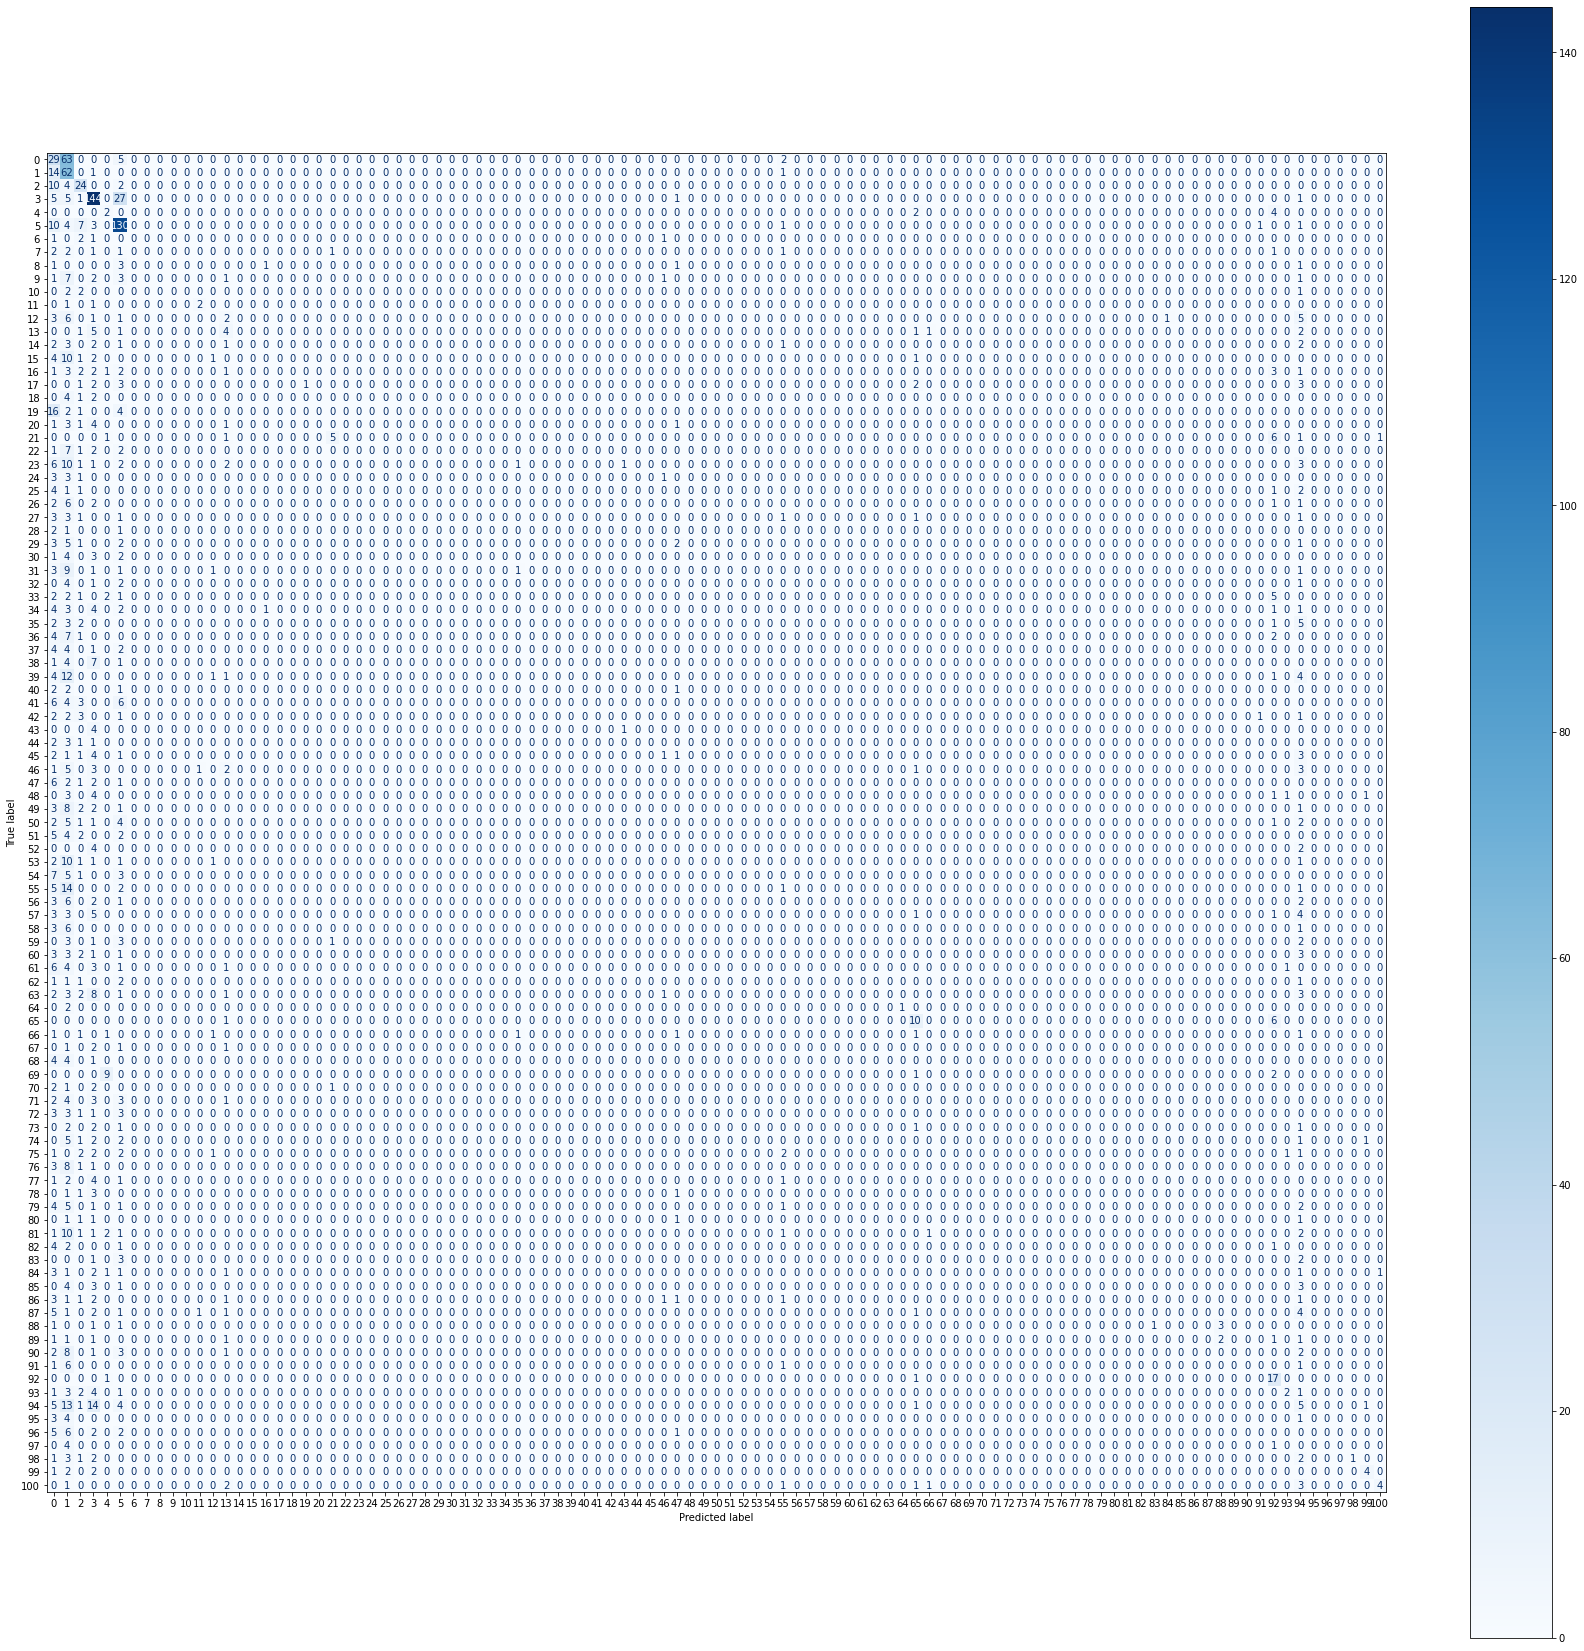

In [35]:
fig, ax = plt.subplots(figsize=(30,30))
plot_confusion_matrix(svc_one_vs_rest,x_test,y_test,cmap=plt.cm.Blues,ax=ax)

# YÊU CẦU 5

---

Áp dụng thuật toán SVC xác định giá trị tham số C để đạt được Accuracy tốt nhất.

In [36]:
best_score = 0
best_c = 0
for i in range(1,51):
    svc = SVC(C=i)
    svc.fit(x_train, y_train)

    score = svc.score(x_val, y_val)
    if score > best_score:
        best_score = score
        best_c = i
    print(f'with C={i}, Score of SVC: {score}')

print(f"With C = {best_c}, Best score = {best_score}")

with C=1, Score of SVC: 0.2489913544668588
with C=2, Score of SVC: 0.2553314121037464
with C=3, Score of SVC: 0.25821325648414983
with C=4, Score of SVC: 0.2610951008645533
with C=5, Score of SVC: 0.26685878962536025
with C=6, Score of SVC: 0.27146974063400575
with C=7, Score of SVC: 0.2743515850144092
with C=8, Score of SVC: 0.27319884726224786
with C=9, Score of SVC: 0.2749279538904899
with C=10, Score of SVC: 0.27780979827089336
with C=11, Score of SVC: 0.27838616714697406
with C=12, Score of SVC: 0.2749279538904899
with C=13, Score of SVC: 0.2743515850144092
with C=14, Score of SVC: 0.2737752161383285
with C=15, Score of SVC: 0.27262247838616716
with C=16, Score of SVC: 0.27204610951008645
with C=17, Score of SVC: 0.2737752161383285
with C=18, Score of SVC: 0.2749279538904899
with C=19, Score of SVC: 0.2760806916426513
with C=20, Score of SVC: 0.276657060518732
with C=21, Score of SVC: 0.27838616714697406
with C=22, Score of SVC: 0.27953890489913547
with C=23, Score of SVC: 0.27896